## Les fonctions on va apprendre:
- & | ~

### Analyser et sortir les dates de toutes les croix dorées et croix mortes
#### La croix d'or et la croix morte dans la technologie d'analyse des stocks peuvent être simplement expliquées comme suit :
- Analysez les deux lignes de l'indicateur, l'une pour la ligne de l'indicateur à court terme et l'autre pour la ligne de l'indicateur à long terme.
- Si la direction de la ligne de l'indicateur à court terme tourne vers le haut et croise la ligne de l'indicateur à plus long terme, cet état est appelé "croix d'or".
- Si la direction de la ligne de l'indicateur à court terme tourne vers le bas et croise la ligne de l'indicateur à plus long terme, cet état est appelé "croix de la mort".
- Dans des circonstances normales, après une croix d'or, l'opération tend à acheter, tandis qu'une croix de la mort tend à vendre. Bien sûr, la croix d'or et la croix de la mort ne sont qu'un des indicateurs d'analyse, et elles doivent être utilisées conjointement avec de nombreux autres indicateurs pour augmenter la précision de l'opération.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("action600519.csv")
df

,Unnamed: 0,date,open,close,high,low,volume,code
0,0,2018-01-02,594.559,598.409,604.719,584.449,49612.0,600519
1,1,2018-01-03,596.059,610.419,615.959,594.299,52019.0,600519
2,2,2018-01-04,615.959,631.629,638.059,613.889,72205.0,600519
3,3,2018-01-05,635.559,632.919,640.589,622.779,39989.0,600519
4,4,2018-01-08,629.579,646.689,651.059,629.579,52204.0,600519
...,...,...,...,...,...,...,...,...
1327,1327,2023-06-21,1740.000,1735.830,1756.600,1735.000,17721.0,600519
1328,1328,2023-06-26,1720.110,1709.000,1730.000,1695.000,23993.0,600519
1329,1329,2023-06-27,1709.990,1711.050,1719.700,1700.090,15174.0,600519
1330,1330,2023-06-28,1713.180,1728.380,1734.000,1711.000,18574.0,600519


In [2]:
df.set_index('date',inplace = True)
df.drop(labels = 'Unnamed: 0', axis = 1,inplace = True)

In [3]:
df

,open,close,high,low,volume,code
date,,,,,,
2018-01-02,594.559,598.409,604.719,584.449,49612.0,600519
2018-01-03,596.059,610.419,615.959,594.299,52019.0,600519
2018-01-04,615.959,631.629,638.059,613.889,72205.0,600519
2018-01-05,635.559,632.919,640.589,622.779,39989.0,600519
2018-01-08,629.579,646.689,651.059,629.579,52204.0,600519
...,...,...,...,...,...,...
2023-06-21,1740.000,1735.830,1756.600,1735.000,17721.0,600519
2023-06-26,1720.110,1709.000,1730.000,1695.000,23993.0,600519
2023-06-27,1709.990,1711.050,1719.700,1700.090,15174.0,600519


In [4]:
ma5 = df['close'].rolling(5).mean()
ma30 = df['close'].rolling(30).mean()

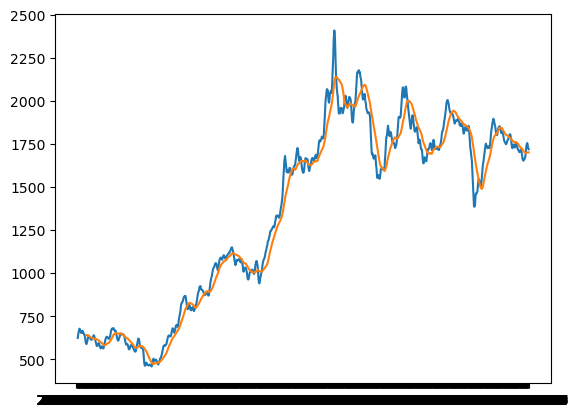

In [5]:
plt.plot(ma5)
plt.plot(ma30)

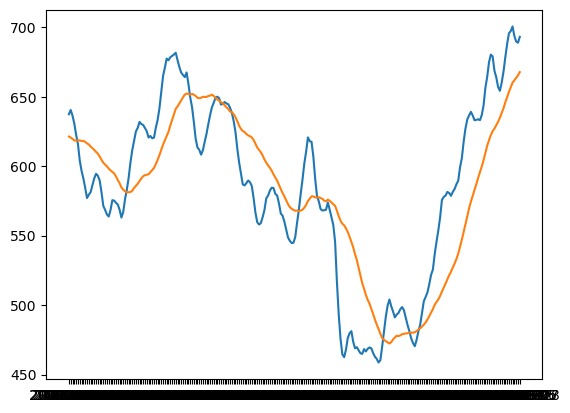

In [6]:
plt.plot(ma5[50:300])
plt.plot(ma30[50:300])

In [7]:
ma5 = ma5[30:]
ma30 = ma30[30:]

In [8]:
ma5

date
2018-02-13     590.021
2018-02-14     597.025
2018-02-22     605.317
2018-02-23     617.127
2018-02-26     626.333
                ...   
2023-06-21    1755.196
2023-06-26    1745.996
2023-06-27    1728.668
2023-06-28    1725.544
2023-06-29    1719.594
Name: close, Length: 1302, dtype: float64

In [9]:
ma30

date
2018-02-13     640.751333
2018-02-14     640.837667
2018-02-22     641.017000
2018-02-23     641.154333
2018-02-26     640.867000
                 ...     
2023-06-21    1700.501000
2023-06-26    1700.232000
2023-06-27    1700.387000
2023-06-28    1700.789667
2023-06-29    1701.137000
Name: close, Length: 1302, dtype: float64

In [10]:
s1 = ma30 > ma5 
s1

date
2018-02-13     True
2018-02-14     True
2018-02-22     True
2018-02-23     True
2018-02-26     True
              ...  
2023-06-21    False
2023-06-26    False
2023-06-27    False
2023-06-28    False
2023-06-29    False
Name: close, Length: 1302, dtype: bool

In [11]:
s2 = ma30 < ma5 
s2

date
2018-02-13    False
2018-02-14    False
2018-02-22    False
2018-02-23    False
2018-02-26    False
              ...  
2023-06-21     True
2023-06-26     True
2023-06-27     True
2023-06-28     True
2023-06-29     True
Name: close, Length: 1302, dtype: bool

In [12]:
_mort = s1 & s2.shift(1)
_mort

date
2018-02-13    False
2018-02-14    False
2018-02-22    False
2018-02-23    False
2018-02-26    False
              ...  
2023-06-21    False
2023-06-26    False
2023-06-27    False
2023-06-28    False
2023-06-29    False
Name: close, Length: 1302, dtype: bool

In [13]:
df = df[30:]
croix_mort = df.loc[_mort] # croix de la mort

In [14]:
date_mort = croix_mort.index
date_mort

Index(['2018-03-27', '2018-06-28', '2018-07-23', '2018-07-31', '2018-10-15',
       '2018-12-25', '2019-05-10', '2019-07-22', '2019-11-28', '2020-01-03',
       '2020-02-28', '2020-03-18', '2020-08-10', '2020-09-21', '2020-10-27',
       '2021-03-01', '2021-04-15', '2021-05-06', '2021-06-22', '2021-11-04',
       '2022-01-06', '2022-05-13', '2022-07-21', '2022-10-10', '2023-02-08',
       '2023-02-23', '2023-04-12'],
      dtype='object', name='date')

In [15]:
_or = ~(s1|s2.shift(1))

In [18]:
croix_or = df.loc[_or] # croix d'or
croix_or

,open,close,high,low,volume,code
date,,,,,,
2018-03-16,642.159,634.409,648.539,633.439,35855.0,600519
2018-05-09,603.639,596.509,606.859,591.679,32331.0,600519
2018-07-18,647.988,642.998,655.248,640.558,24521.0,600519
2018-07-25,652.508,649.368,655.438,645.568,21743.0,600519
2018-09-20,590.758,584.108,592.458,582.918,27519.0,600519
2018-12-04,508.548,507.788,509.818,500.558,31473.0,600519
2019-01-03,505.528,495.558,507.218,491.358,30977.0,600519
2019-06-14,816.558,818.558,837.858,815.578,42455.0,600519
2019-08-13,936.257,938.047,946.097,930.777,30329.0,600519


In [19]:
date_or = croix_or.index
date_or

Index(['2018-03-16', '2018-05-09', '2018-07-18', '2018-07-25', '2018-09-20',
       '2018-12-04', '2019-01-03', '2019-06-14', '2019-08-13', '2020-01-02',
       '2020-02-19', '2020-03-03', '2020-04-02', '2020-08-19', '2020-10-14',
       '2020-11-05', '2021-04-02', '2021-04-16', '2021-05-20', '2021-09-16',
       '2021-11-23', '2022-04-07', '2022-06-02', '2022-09-29', '2022-11-18',
       '2023-02-14', '2023-03-31', '2023-06-15'],
      dtype='object', name='date')